In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest


In [2]:
df = pd.read_csv("data/sensor_data.csv")
df


,Time,Temperature,Pressure,Voltage
0,1,35.0,101.2,3.3
1,2,36.0,101.1,3.3
2,3,35.5,101.3,3.2
3,4,36.2,101.2,3.3
4,5,35.8,101.1,3.3
5,6,36.0,101.0,3.3
6,7,80.0,120.0,5.5
7,8,36.1,101.2,3.3
8,9,35.9,101.3,3.3
9,10,20.0,90.0,2.1


In [3]:
df.describe()


,Time,Temperature,Pressure,Voltage
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,38.650000,101.940000,3.390000
std,3.02765,15.359127,7.253229,0.830596
min,1.00000,20.000000,90.000000,2.100000
25%,3.25000,35.575000,101.100000,3.300000
50%,5.50000,35.950000,101.200000,3.300000
75%,7.75000,36.075000,101.275000,3.300000
max,10.00000,80.000000,120.000000,5.500000


In [4]:
X = df[["Temperature", "Pressure", "Voltage"]]


In [5]:
model = IsolationForest(
    contamination=0.2,  # expected % of anomalies
    random_state=42
)

model.fit(X)


,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",100
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.2
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [6]:
df["Anomaly"] = model.predict(X)
df


,Time,Temperature,Pressure,Voltage,Anomaly
0,1,35.0,101.2,3.3,1
1,2,36.0,101.1,3.3,1
2,3,35.5,101.3,3.2,1
3,4,36.2,101.2,3.3,1
4,5,35.8,101.1,3.3,1
5,6,36.0,101.0,3.3,1
6,7,80.0,120.0,5.5,-1
7,8,36.1,101.2,3.3,1
8,9,35.9,101.3,3.3,1
9,10,20.0,90.0,2.1,-1


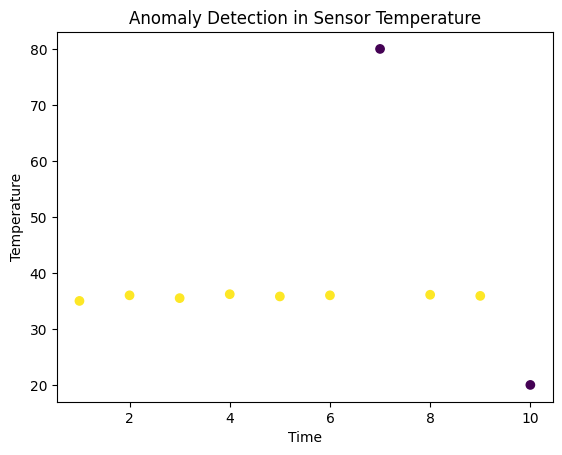

In [7]:
plt.scatter(df["Time"], df["Temperature"], c=df["Anomaly"])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Anomaly Detection in Sensor Temperature")
plt.show()


In [8]:
anomalies = df[df["Anomaly"] == -1]
anomalies


,Time,Temperature,Pressure,Voltage,Anomaly
6,7,80.0,120.0,5.5,-1
9,10,20.0,90.0,2.1,-1
